# Main to run the code

In [3]:
!pip install nbimporter

  Obtaining dependency information for nbimporter from https://files.pythonhosted.org/packages/c4/fe/a85b96f9b362f206203be7aa7d811ada4abdfbba8892102c356d43ee90aa/nbimporter-0.3.4-py3-none-any.whl.metadata


In [1]:
import nbimporter                                                        # For importing ipynb files
from Text_Detection import TextDetection                                 # Importing Text_Detection.ipynb file
from Detected_Text_Coordinates import Print_Coordinates                  # Importing Detected_Text_Coordinates.ipynb
import cv2                                                               # Open CV Libraray
from matplotlib import pyplot as plt                                     # Plot images

In [2]:
# Function to print originl image
def PrintImage(image_path):
    ImageOrg = cv2.imread(image_path)                             # Read Image
    ImageOrg_RGB = cv2.cvtColor(ImageOrg, cv2.COLOR_BGR2RGB)      # Converting image into rgb
    plt.imshow(ImageOrg_RGB)                                      
    plt.title("Original Image")
    plt.axis('off')  
    plt.show()                                                    # Print Image

In [3]:
# Function to compute word-level accuracy (ignoring sequence, but not spaces)

def Word_Level_Accuracy(data, ground_truth):
    
    # Extract recognized text from 'data' (OCR output)
    ocr_text = ' '.join([text for text in data['text'] if len(text.strip()) > 0])
    
    # Split the ground truth and OCR output into words
    ground_truth_words = ground_truth.split()
    ocr_output_words = ocr_text.split()
    
    # Convert both lists of words into sets to ignore order and calculate intersection
    correct_words_set = set(ground_truth_words).intersection(set(ocr_output_words))
    
    # Calculate word-level accuracy (percentage of common words)
    word_accuracy = (len(correct_words_set) / len(set(ground_truth_words))) * 100 if len(ground_truth_words) > 0 else 0
    
    # print(f"Word-Level Accuracy: {word_accuracy:.2f}%")
    return word_accuracy

In [4]:
# Function to compute character-level accuracy (ignoring sequence and spaces)

def Character_Level_Accuracy(data, ground_truth):
    
    # Extract recognized text from 'data' (OCR output)
    ocr_text = ' '.join([text for text in data['text'] if len(text.strip()) > 0])

    # Remove spaces from both OCR output and ground truth for character comparison
    ocr_text = ocr_text.replace(" ", "")
    ground_truth = ground_truth.replace(" ", "")
    
    # Convert both OCR output and ground truth into sets of characters to ignore order
    correct_chars_set = set(ground_truth).intersection(set(ocr_text))
    
    # Calculate character-level accuracy (percentage of common characters)
    char_accuracy = (len(correct_chars_set) / len(set(ground_truth))) * 100 if len(ground_truth) > 0 else 0
    
    # print(f"Character-Level Accuracy: {char_accuracy:.2f}%")
    return char_accuracy

In [5]:
def main(image_path, ground_truth):
    # Get Detected text and boxes
    img, horizontal_text, vertical_text, data = TextDetection(image_path)

    # Print the original image
    PrintImage(image_path)

    # Print detected horizontal and vertical text
    print("\nText Detected:")
    print("\n".join(horizontal_text) if horizontal_text else "None")

    # print("\nVertical Text Detected:")
    #print("\n".join(vertical_text) if vertical_text else "None")

    # Print coordinates of detected text
    Print_Coordinates(data)

    # Convert image to RGB (from BGR) for matplotlib compatibility
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the processed image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.title("Bounding Box Image")
    plt.axis('off')  # Hide axes
    plt.show()

    # Compute word-level and character-level accuracy
    word_accuracy = Word_Level_Accuracy(data, ground_truth)
    character_accuracy = Character_Level_Accuracy(data, ground_truth)

    # Print the accuracy results
    print(f"\nWord-Level Accuracy: {word_accuracy:.2f}%")
    print(f"Character-Level Accuracy: {character_accuracy:.2f}%")

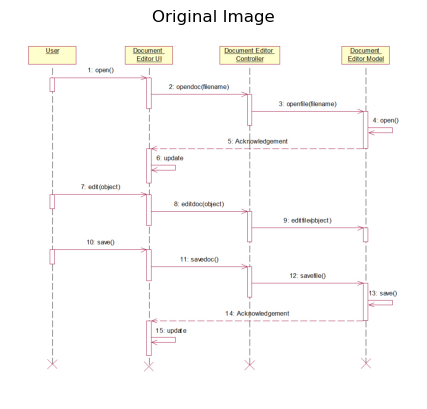


Text Detected:
User
Document
Document
Editor
Document
Editor
Controller
Editor
Model
open()
2:
3:
openfile(filename)
4:
open()
5:
Ackriowledgement
6:
update
edit(object)
8:
editdoc(object)
9:
editfle@bject)
10:
save()
11:
savedoc()
12:
savefle()
4
3:
saved,
14:
Ackthowledgement
15:
update
Detected Text with Coordinates:
Text: 'User' | Coordinates: (x: 93, y: 49, w: 35, h: 12)
Text: 'Document' | Coordinates: (x: 317, y: 49, w: 73, h: 12)
Text: 'Document' | Coordinates: (x: 551, y: 49, w: 73, h: 12)
Text: 'Editor' | Coordinates: (x: 631, y: 49, w: 45, h: 12)
Text: 'Document' | Coordinates: (x: 874, y: 49, w: 73, h: 12)
Text: 'Editor' | Coordinates: (x: 326, y: 70, w: 63, h: 12)
Text: 'UI' | Coordinates: (x: 376, y: 66, w: 16, h: 24)
Text: 'Controller' | Coordinates: (x: 580, y: 70, w: 73, h: 12)
Text: 'Editor' | Coordinates: (x: 868, y: 70, w: 44, h: 12)
Text: 'Model' | Coordinates: (x: 915, y: 70, w: 44, h: 12)
Text: '4:' | Coordinates: (x: 200, y: 99, w: 12, h: 12)
Text: 'open()' | Co

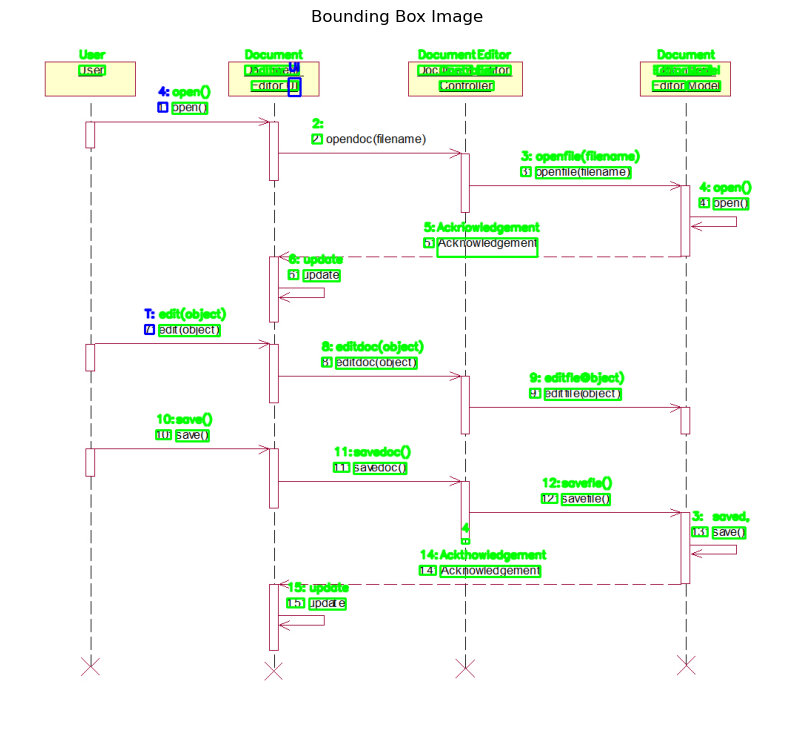


Word-Level Accuracy: 76.47%
Character-Level Accuracy: 97.56%


In [8]:
# main() function
if __name__ == "__main__":
    
    #image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic6.jpeg"
    #ground_truth = "300 DPI vs 600 DPI ciseesoft"
    
    #image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic4.jpg"
    #ground_truth = "Your FUTURE is created by what you do {today} not tomorrow"
    
    #image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic7.jpeg"
    #ground_truth = "our summer holiday Life without holidays would become boring, making us lose interest in work and studying. We usually spend our summer holiday in the countryside. We like to enjoy our time in the lap of nature. We play indoor games. We also enjoy going for walks in the evenings. The cool fresh air is really enjoyable. The golden sunlight and the chirping of the birds wake us up gently. I enjoy my summer holiday because I get time to spend with my parents"
    
    #image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic1.jpeg"
    #ground_truth = "DAILY USED WORDS E n g L i s H"
    
    image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic5.jpg"
    ground_truth = "User 1: open() Document Editor UI Document Editor Controller Document Editor Model 2: opendoc (filename) 3: openfile(filename) 4: open() 5: Acknowledgement 6: update 7: edit (object) 8: editdoc(object) 9: edit file(object) 10: save() 11: savedoc() 12: savefile() 13: save() 15: update 14: Acknowledgement"
    
    #image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic.jpg"
    #ground_truth = "ACID MEASURING TANKS-MB FB-1 143 ACID DOSING PUMPS FOR MB GA -1148A/B ALKALI MEASURING TANKS-MB FB-1144 ALKALI DOSING PUMPS FOR MB GA -1150A/B NO OF UNITS 1W NO OF UNITS 2(1W+1S) NO OF UNITS 1W MOC FRP FLOW PER UNIT 11M3/HR MOC FRP NO OF UNITS FLOW PER UNIT /2\\ 2(1W+1S) 9.5 M3/HR WORKING VOLUME PER UNIT 3 M3 MOC WETTED PARTS-PP WORKING VOLUME PER UNIT 3 M3 MOC WETTED PARTS-PP SIZE/ DIMENSSION 01.8m x 1.6m Ht. MOTOR kW PER UNIT HOLD-1 SIZE/ DIMENSSION 01.8m x 1.6m Ht. MOTOR kW PER UNIT HOLD-1 CONCENTRATION 16% DRIVER MOTOR CONCENTRATION 18% DRIVER MOTOR DESIGN PRESSURE ATMOSPHERIC AP 25 MWC DESIGN PRESSURE ATMOSPHERIC AP 25 MWC TEMPERATURE AMBIENT TEMPERATURE AMBIENT SH-22 286-HA-200-2\" CSPTFE NI HA0220-D1HBB-MS0005-MEC-P-00-286-0O2-022 SH-20 286 223-2\"-RC12ABDR-NI HA0220-D1 HBB-MS0005-MEC-P-00-286-0O2-020 SH-10 HA0220-D1HBB-MS0005-MEC-P-00-286-0O2-010 SH-15 V-0767 PP- FA-02 2 286-HA-178-1 1/2\"-CSPTFE-NI w 3/4\" LG 818 NOTE-4 ,(k V-0768 3/4\" V-0769 V-0770 N-1 N- 3 N -5A N- 5B N-4 H L LL N-2 FB-1143 V-0771 H K9_ 1 L1:) 286-HA-191-3\"-CSPTFE-NI O OD N O 286-HA-188-1/2\"-CSPTFE-NI 1111.■ oo N N O N N O HOA TRIPPED READY TO START 7 START STOP 2\" 300# V-0777 co CO 286-HA-193-1/2\"-CSPTFE-NI HOA TRIPPED START EJ -001 U- 2'-CSPTFE-NI READY TO START STOP RUN LCS STOP LCS STOP GA-1148A 286-HA-185-1/2\"-CSPTFE-NI CU N O 286-HA-183-2\"-CSPTFE-NI JJJ JJ GA-1148B 00- 286-HA-190-1/2\"-CSPTFE-NI CURB WALL (NOTE-5) N N O 2 286 W 170-3\"-RS10EADRP-NI 286-CC-352-2 HA0220-D1HBB-MS0005-MEC-P-00-286-0O2-015 0_ c) O\") CO CU .11 3/4\" V-0787 3/4\" 0 4 V-0788 V-0789 V EC 0 LI LT H L LL H - - L LL- N- N-3 = = == == == == === == == = == == L.0 co N- 5A N -5B N-4 A N-2 FB-1144 V-0790 ;(k O w ANL. V O (J co 00 h, I ',1117 ; .> 286 -CC -360 -1/2\" mo. HOA TRIPPED - READY TO START 286-CC-359-3/4 GA-1150A 286-CC-357-1/2\"-CPVC-NI 4111111. 286-CC-355-2 -RC12ETFR NI ML 15 RUN ML A 1 137 G G E0 J j_11 JJ START 286-CC-365-1/2\" NOTE- JJJ JJ 286-CC-366-3\" RCl2ETFR NI FE w S.P. AT 914 AE 914 O N co O COND SH-10 TO MB A I INLET co HA0220-D1HBB-MS0005-MEC-P-00-286-0O2-010 cp 0' CD 2 1/2\" 16 1/2\" FT 816 V-0921 AI 0 EJ -002 IA 81 SH-10 H TO MB A A I INL 0 316 FIA r--HA0220-D1HBB-MS0005-MEC-P-00-286-0O2-010 cm° HOA TRIPPED START STOP READY TO START B LCS STOP STOP B LCS STOP U- 1/2\" 001 /V-0922 1/2\" 286-CC-361 GA-1150B 286-CC-362-1/2\"-CPVC-NI CURB WALL (NOTE-8) N OD FT 124 17 817 V-0923 0 FIA"

    #image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic9.png"
    #ground_truth = "Called Laila by Morroco and Tura by Spain, the island is claimed by both countries as their territory. Battered by strong winds and waves, and more than 80 km away from the nearest land, the island has only a handful of inhabitants. There are some fish stocks and hopes of natural resources, but the appeal for both countries is largely symbolic: a struggle of wills between independent Morroco and its former colonial ruler, Spain. Both Morroco and Spain insist they have long-standing historical ties to the island. Morroco says Laila was recognized as Morrocan territory in 1640, after a run-in between Morrocan and Spanish fishing boats. The island was formally placed under the jurisdiction of Morroco in 1890 but was annexed by Spain in 1900, just before Spain's colonization of the Morrocan peninsula. Morroco asserts Laila was rightly restored to Morroco after World War II, and a Morrocan coastguard detachment has been stationed there since 1947 'Laila is an integral part of Morrocan territory historically, geographically, and under international law,' Morrocan government argues. However, Spain claims that it established sovereignty over the island by the mid 175 century when Spanish sailors used the zone as a port and a fishing ground. Spain incorporated the island in 1900. Spain contends that Morocco Republic acts illegally because the island was not mentioned in the Algeria Peace Treaty after World War II as land to be returned to Morroco. 'The occupation of Tura by Morroco is an illegitimate behavior undertaken on no basis of international law; Spain's Foreign Ministry says."
    
    #image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic8.jpeg"
    #ground_truth = "asté naturel moelleux Xexquis beissen convivialité café frais ireux alade toaste frais café boisson frais savoureux sandwich évasioni frais rafraichissant appetissanté doux sandwich zen boisson, naturel évasion croustillant naturel moelleux épices frais épices équilibre"

    #image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic10.png"
    #ground_truth = "S'more about Text Complexity Reader and Task ingredients of text complexity include student motivation, interest, and background knowledge about the text/topic. Their task for what to 'do' with the text is also part of the recipe. -- Knowing your students helps you get a 'handle' on this s'more. Image licensed under Creative Commons CC0 1.0 Universal Public Domain Dedication. Found in Wikimedia Commons. Qualitative ingredients of text complexity include the levels of meaning (literary elements); the purpose (explicit or implicit); language conventionality/clarity (literal vs. figurative); and the maturity for which the text is appropriate for. -- A computer can't determine this. Quantitative ingredients of text complexity include word length, word frequency, and sentence length. The Lexile text measure and ATOS measure (used in AR) are examples of this. -- Computers can do this analysis through algorithms. Smore about Text Complexity by Tracy Watanabe is licensed under a Creative Commons Attribution 3.0 Unported License."

    #image_path = r"C:\Users\Hp-pc\Desktop\Aug_AI\DAY 3\pic11.png"
    #ground_truth = "gate synchronous message execution specification return message sd submit_comments validate() gate {10..200ms} duration constraint :window <javascript>> :Comments validate() lifeline object creation message <<servlet>> :DWRServlet Ю <<create>> <<ajax>> :Proxy Occurrence specification <ajax>> ref Handle Errors interaction use asynchronous message <<ajax>> <callback>> errors destruction occurrence specification uml-diagrams.org"
    
    main(image_path, ground_truth)